In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata ,how = "left",  on="Mouse ID")

In [5]:
# Display the data table for preview
(combined_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
num_mice = combined_data ["Mouse ID"].nunique()
print(num_mice)


249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mask = combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_data = combined_data[duplicate_mask]
duplicate_mouse_ids = duplicate_mice_data["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"] == 'g989']
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != 'g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
num_mice_clean

248

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])


summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor volume Variance',
    'std': 'Tumor volume Std Dev',
    'sem': 'Tumor volume std. Err.'
}, inplace=True)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor volume Variance,Tumor volume Std Dev,Tumor volume std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})


summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Var',
    'std': ' Std ',
    'sem': ' Sem'
}, inplace=True)
summary_stats

Tumor Volume (mm3)                                          
                           Mean     Median        Var      Std        Sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

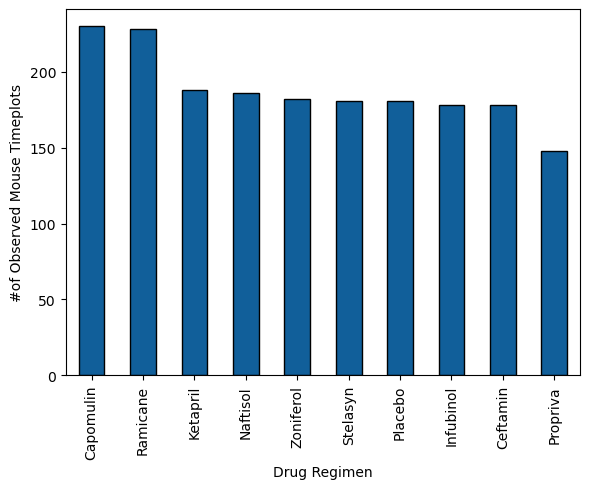

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data["Drug Regimen"].value_counts()
drug_counts.plot(kind='bar', figsize=(6, 5), color='#115f9a', edgecolor='black')
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timeplots")

plt.tight_layout()
plt.show()


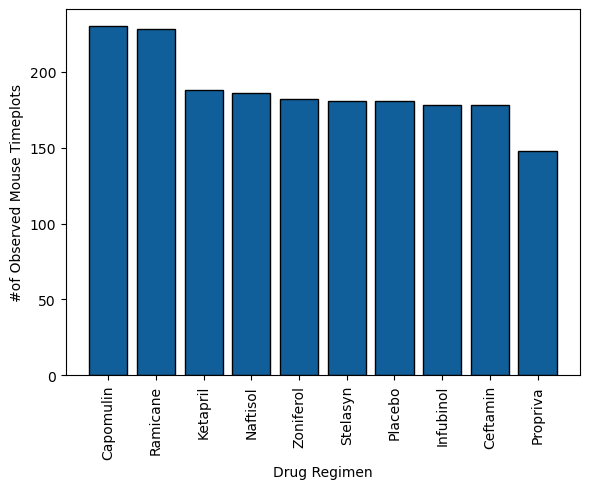

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(6, 5))
plt.bar(drug_counts.index, drug_counts, color='#115f9a', edgecolor='black')
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timeplots")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


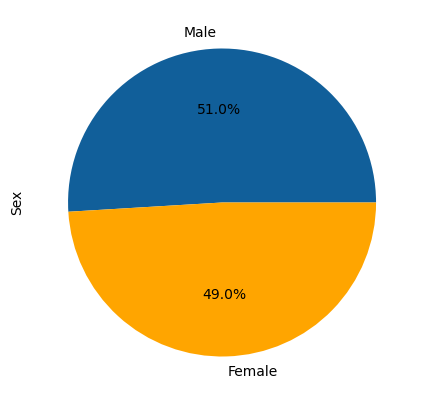

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data["Sex"].value_counts()
gender_counts.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', colors=['#115f9a', 'orange'])
plt.show()

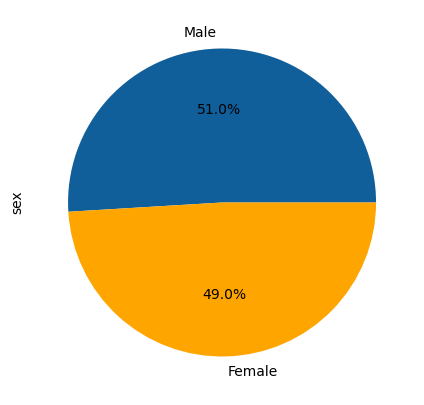

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data["Sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.ylabel("sex")
plt.pie(gender_counts, labels=gender_counts.index, colors=['#115f9a', 'orange'], autopct='%1.1f%%')
plt.show()

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volume_df = last_timepoint.merge(clean_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and late for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for regimen in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_data.loc[clean_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    # Add subset
    tumor_vol_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


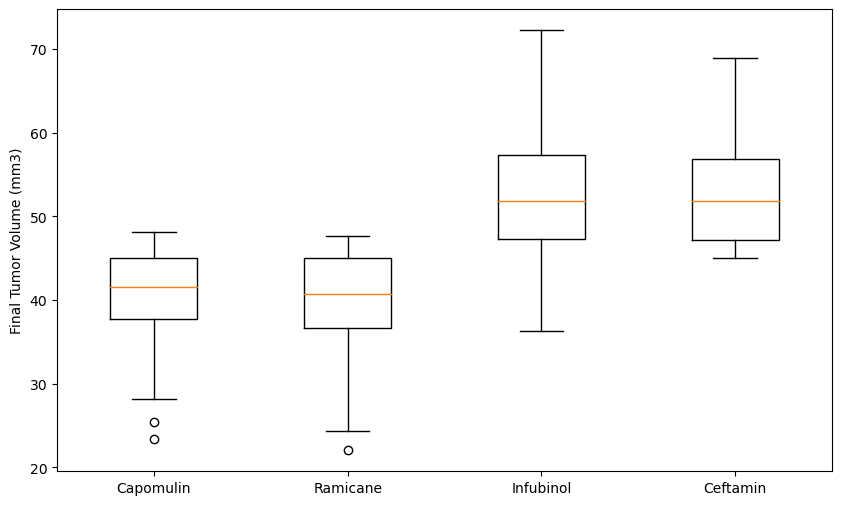

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))  
plt.boxplot(tumor_vol_data, labels=treatment_regimens)

plt.ylabel('Final Tumor Volume (mm3)')


plt.show()

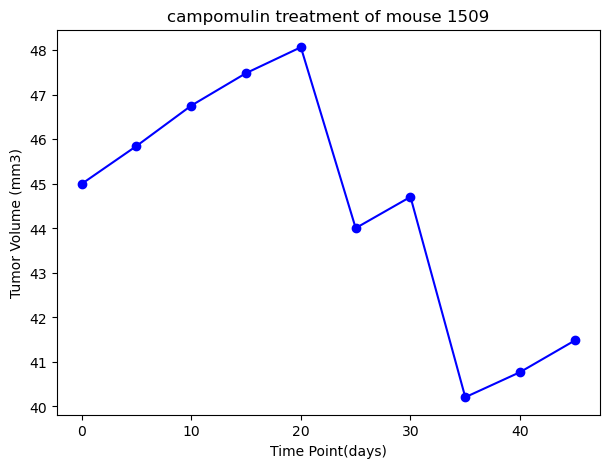

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_id = 'l509'


capomulin_data = combined_data[(combined_data['Mouse ID'] == Mouse_id) & (combined_data['Drug Regimen'] == 'Capomulin')]


timepoints = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

plt.figure(figsize=(7, 5))
plt.plot(timepoints, tumor_volumes, marker='o', linestyle='-', color='b')

plt.title(f"campomulin treatment of mouse 1509")
plt.xlabel("Time Point(days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()


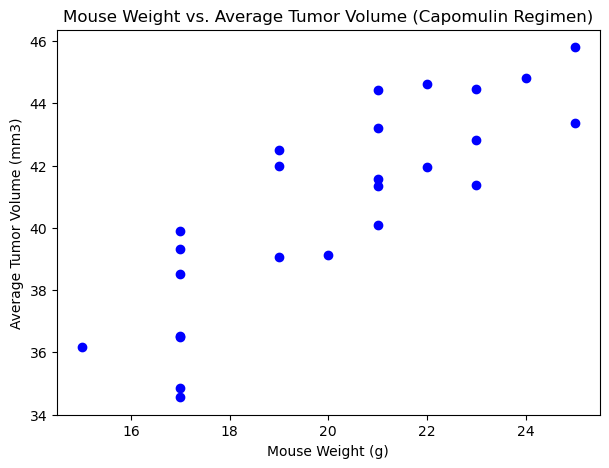

In [21]:
# Step 4: Create the scatter plot
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


plt.figure(figsize=(7, 5))  
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


Correlation Coefficient: 0.84


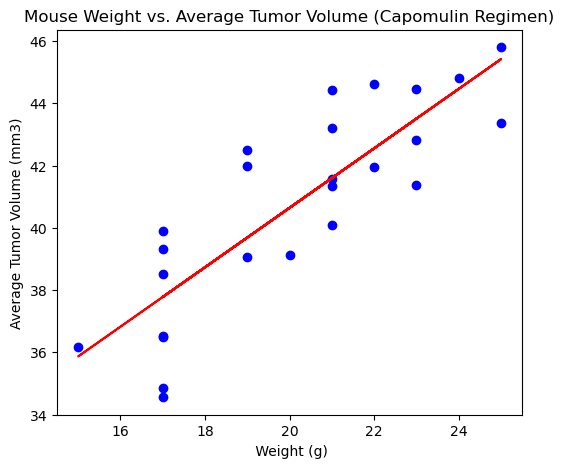

In [22]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


slope, intercept, _, _, _ = st.linregress(mouse_weights, average_tumor_volume)


regression_line = slope * mouse_weights + intercept


plt.figure(figsize=(6, 5)) 
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue', label='Data')
plt.plot(mouse_weights, regression_line, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel(' Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
